## 3.3 Спроектувати i розробити нейронну мережу на основi набору даних FMNIST

### Імпортуємо значення набору даних MNIST з пакету keras. Вхідні дані мають розмір у 60 000 екземплярів та розширення у 32 * 32 пікселів.

In [47]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

*Завантаження датасету FMNIST*

### Позначимо індекси для кращого розуміння, що кожне число в y_train означає.

In [48]:
indexes = ['T-shirt/top', 'Trouser', 'Pullover',
           'Dress', 'Coat', 'Sandal', 'Shirt',
           'Sneaker', 'Bag', 'Ankle']

*Індекси, тобто імена класів*

### Переглянемо перші 25 зображень та відповідні їм індекси за допомогою модуля matplotlib.pyplot.

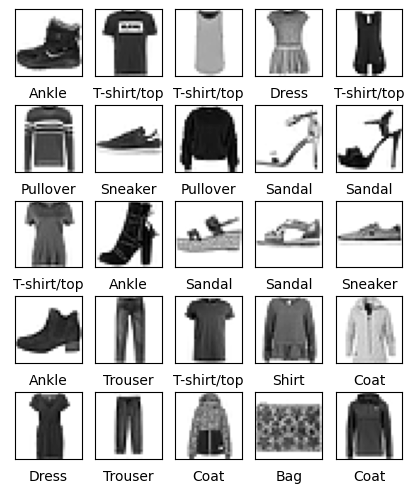

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 6))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(indexes[train_labels[i]])

*Зображення перших двадцяти п'яти елементів*

### Робимо перетворення тривимірного масиву в двовимірний масив типу float 32. Далі нормалізовуємо його, щоб отримати значення в інтервалі від [0, 1]. 

In [50]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

*Нормалізація даних*

### Тепер підготуємо мітки, а саме будемо завантажувати масиви із відгуками на кожне тестове зображення.

In [51]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

*Підготування міток*

### За архітектуру моделі оберемо Sequential. Використаємо щільні шари, де кожен нейрон одного шару зв  язаний з нейроном іншого. Прихований шар маює по 64 нейрони. Оскільки у нас є 10 індексів, то і вихідний шар міститиме 10 нейронів.

In [52]:
from keras import models, layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

*Побудова архітектури моделі*

### Скомпілюємо мережу, привівши її до сумісного вигляду із TensorFlow. Налаштуємо оптимізатор, функцію втрат, метрики.

In [53]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

*Компіляція моделі*

### Навчання моделі.

In [54]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


2023-03-24 13:41:43.487055: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 3s 6ms/step - loss: 0.5538 - accuracy: 0.8025
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3877 - accuracy: 0.8576
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3426 - accuracy: 0.8734
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3132 - accuracy: 0.8849
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2955 - accuracy: 0.8903


*Навчання моделі*

### Перевіримо модель на контрольному наборі даних.

In [55]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

 29/313 [=>............................] - ETA: 0s - loss: 0.3497 - accuracy: 0.8804 

2023-03-24 13:41:57.117915: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.3471 - accuracy: 0.8768


*Перевірка моделі*

### Зробимо збереження моделі командою model.save у форматі HDF5, що містить архітектуру, ваги, конфігурацію тренувань, стан оптимізатора.

In [56]:
network.save('fmnist.h5')

*Збереження моделі*

### Завантажуємо модель з файлу.

In [57]:
from keras.models import load_model
model = load_model('fmnist.h5')

*Завантаження моделі*

### Покажемо тестові картинки, на яких ми будемо тестувати модель.

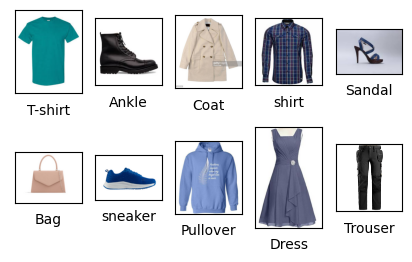

In [63]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = []
image_names = []
for img_path in glob.glob(  '/home/choleraplague/'\
                            'university/MachineLearning/'\
                            'Lab5/images/fmnist/*.jpg'):
    image_names.append(img_path.split('/')[-1].split('.')[0])
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(5, 3))
for i, name in enumerate(image_names):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(name)

*Тестові зображення*

### Завантажимо їх в PIL у форматі ndarray. Потім переформатуємо цей масив до розміру, на якому відбувалося тренування нашої моделі.

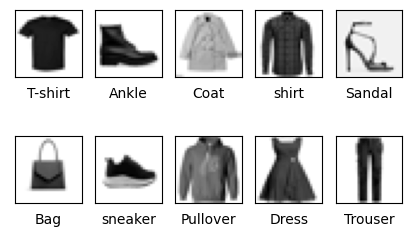

In [79]:
import PIL
import numpy as np

low_images = []

plt.figure(figsize=(5, 3))
for i, im in enumerate(image_names):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    tst = PIL.ImageOps.invert(
        PIL.Image.open(f'images/fmnist/{im}.jpg').convert('L'))
    tst_res = tst.resize((28, 28))
    plt.xlabel(im)
    plt.imshow(tst_res, cmap=plt.cm.binary)
    pix = np.array(tst_res)
    pix = pix.reshape((1, 28*28))
    pix = pix.astype('float32') / 255
    low_images.append(pix)
low_images = np.array(low_images)

*Обробка зображень*

### Спрогнозуємо результати, провівши тестування моделі.

In [80]:
for tst in low_images:
    pred = list(model.predict(tst)[0])
    print(indexes[pred.index(max(pred))])

1/1 [==============================] - 0s 42ms/step
T-shirt/top
1/1 [==============================] - 0s 20ms/step
Bag
1/1 [==============================] - 0s 22ms/step
Shirt
1/1 [==============================] - 0s 23ms/step
Shirt
1/1 [==============================] - 0s 22ms/step
Bag
1/1 [==============================] - 0s 23ms/step
Bag
1/1 [==============================] - 0s 26ms/step
Sandal
1/1 [==============================] - 0s 17ms/step
Coat
1/1 [==============================] - 0s 17ms/step
Dress
1/1 [==============================] - 0s 17ms/step
Trouser


*Спрогнозовані результати*